--------------------------------------------------------------------------------------------------------------------------------

<b>The Sparks Foundation: Data Science & Business Analytics</b>

Submitted by: Vardan Gupta ( vardangupta00@gmail.com )

Batch: July 21

Task-4: Exploratory Data Analysis - Terrorism (Level - Intermediate)

Description: To Perform ‘Exploratory Data Analysis’ on 'globalterrorismdb_0718dist.csv' dataset as a security/defense analyst for minimizing terrorism

Resourses used: globalterrorismdb_0718dist.csv
    
--------------------------------------------------------------------------------------------------------------------------------

<b>Importing The Required Libraries</b>

In [2]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Fetching The Data from csv file</b>

In [3]:
#Importing Dataset

df = pd.read_csv("globalterrorismdb_0718dist.csv", low_memory=False)

<b>Displaying the Data in the Dataset</b>

In [10]:
# Displaying the Data

df.head(200000)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<b>Finding some Information about Dataset</b>

In [11]:
#Finding Information about rows,columns, Datatype,etc...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
#Finding the Count of not-None & not-Nan values

df.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

<h2>Data Cleansing</h2>

<b>Checking for null or NA objects if any then Remove or Replaced</b>

In [14]:
#Finding the names of columns

df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [15]:
#Finding number of null objects per columns

df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [17]:
#Calculating the Percentage of null objects per columns

missing_percentage = df.isnull().sum() * 100 / len(df)
print(missing_percentage)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64


<b>Cleansing the Dataset</b>

In [27]:
#Droping columns with NA values

df.dropna(axis=1, inplace=True)

In [30]:
#Identifying Correlations between columns

df.corr()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.070646,0.002019,0.026215,...,0.137743,0.074173,0.079080,0.017939,-0.011716,-0.278927,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.070659,0.001995,0.026211,...,0.137736,0.074153,0.079082,0.017944,-0.011737,-0.278916,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.004501,0.001568,0.001734,...,0.003071,0.006705,-0.000948,-0.001661,0.007863,-0.005816,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.005367,0.011434,-0.002702,...,0.003593,-0.005333,-0.000052,-0.003788,-0.003019,-0.003903,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.017784,-0.015029,0.001249,...,-0.033961,0.272272,0.011613,-0.008929,0.207802,-0.002096,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.012291,-0.006646,-0.038480,...,-0.050360,-0.021384,-0.019703,0.027918,-0.023708,0.032051,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.073678,0.025521,-0.013163,...,0.112672,0.007642,0.041396,-0.059963,0.013257,-0.183279,-0.082584,-0.071917,0.043139,-0.047900
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,1.000000,0.003330,-0.000534,...,0.008352,0.006504,0.024644,-0.011986,0.001496,-0.019811,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.003330,1.000000,-0.008984,...,0.019039,0.027544,-0.040026,-0.025591,0.029257,-0.007595,0.089973,0.089888,0.015692,0.082288
crit2,0.026215,0.026211,0.001734,-0.002702,0.001249,-0.038480,-0.013163,-0.000534,-0.008984,1.000000,...,0.002770,0.005157,-0.101522,0.003311,-0.008549,-0.002711,-0.024153,-0.023829,-0.012980,-0.027752


<h2>Visualization of Data</h2>

<h3>Year-wise Representation</h3>

<b>Graphically Representing the Year-wise Increase in Terrorism</b>

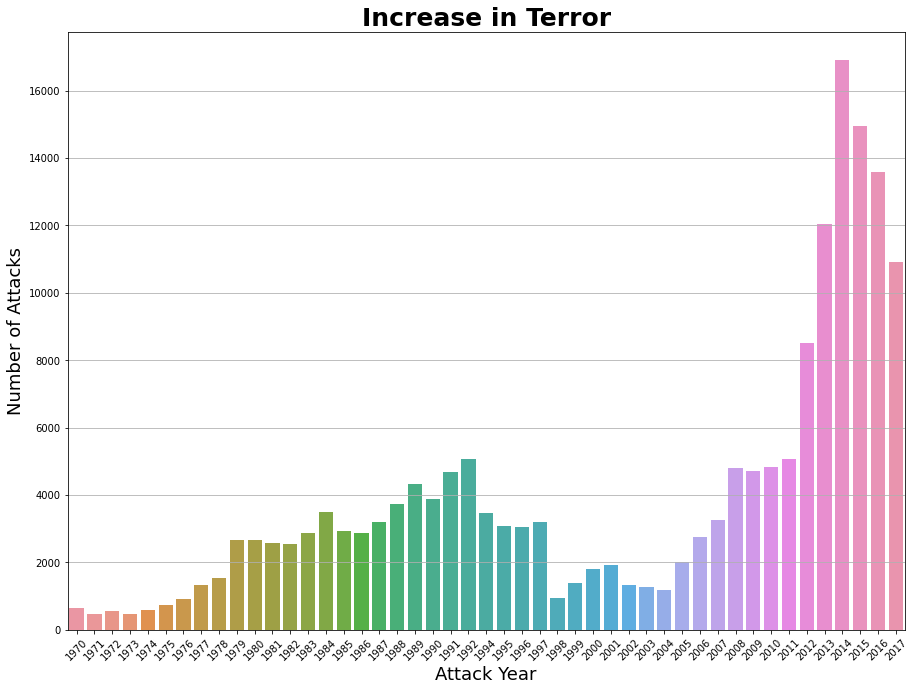

In [37]:
#Graphically Representing the Year-wise Increase in Terrorism

plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["iyear"])
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Attack Year", fontsize=18)
plt.title("Increase in Terror", size=25, fontweight="bold")
plt.grid(axis='y')
plt.show()

<em>Graph clearly shows that the Number of attacks are highest in the year 2014</em>

<b>Graphically Comparing the Year-wise Success rate of Terrorism</b>

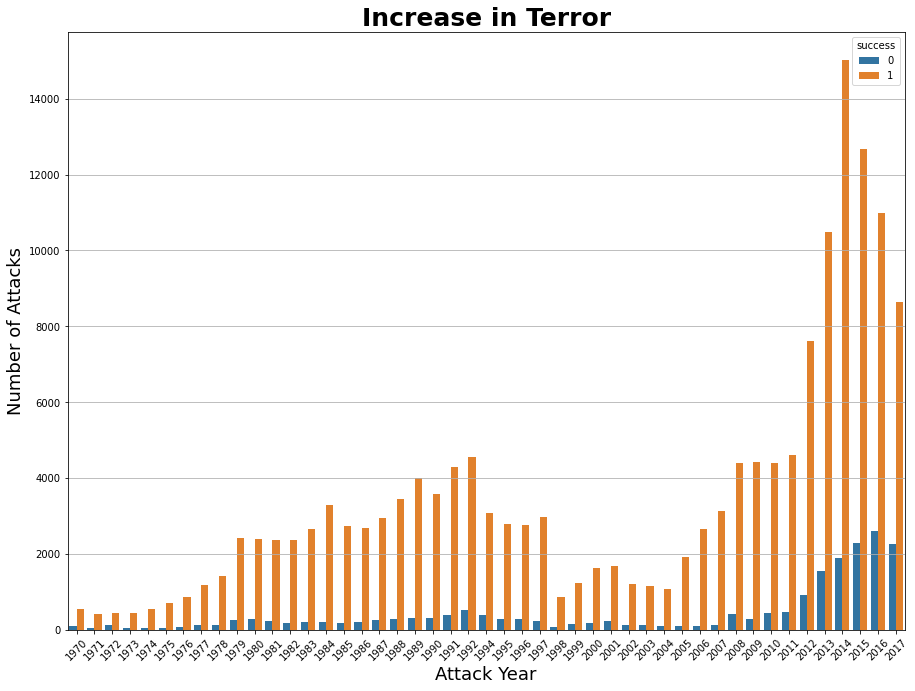

In [48]:
#Graphically Comparing the Year-wise Success rate of Terrorism

plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["iyear"], hue="success", data=df)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Attack Year", fontsize=18)
plt.grid(axis='y')
plt.title("Increase in Terror", size=25, fontweight="bold")
plt.show()

<h3>Country-wise Representation</h3>

<b>Graphically Representing Country wise Terrorism</b>

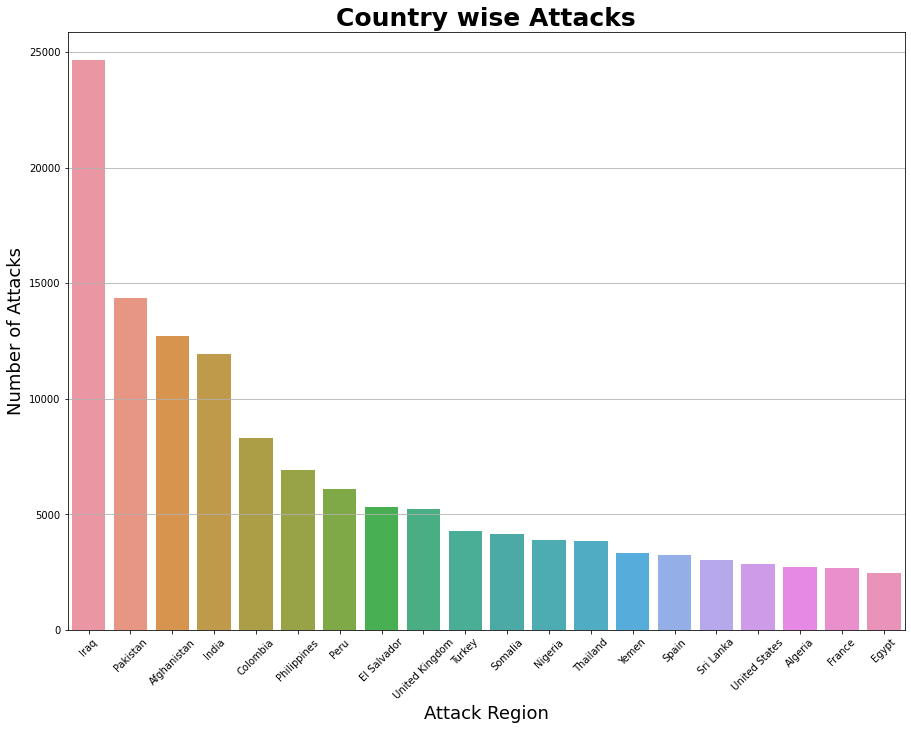

In [47]:
#Graphically Representing Country wise Terrorism

plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["country_txt"].value_counts()[:20].index, y=df["country_txt"].value_counts()[:20].values)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Attack Region", fontsize=18)
plt.grid(axis='y')
plt.title("Country wise Attacks", size=25, fontweight="bold")
plt.show()

<b>Graphically Comparing the Country-wise Success rate of Terrorism</b>

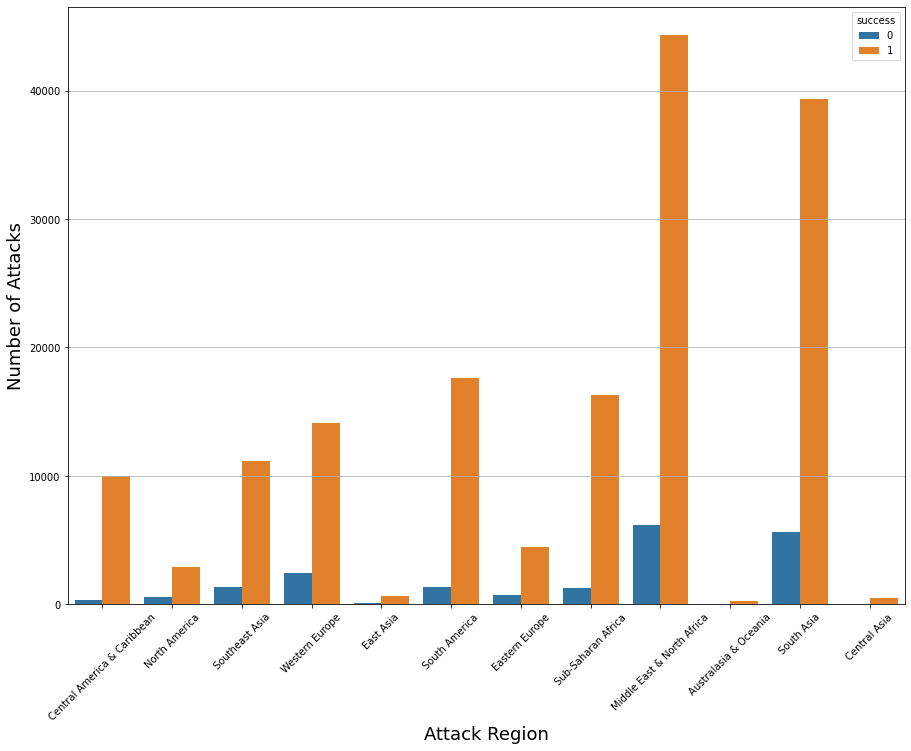

In [46]:
#Graphically Comparing the Country-wise Success rate of Terrorism

plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["region_txt"], hue="success", data=df)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.xlabel("Attack Region", fontsize=18)
plt.show()

<h3>Breif Analysis of Attacks</h3>

<b>Analysing the Type of attack from the sum of overall attacks</b>

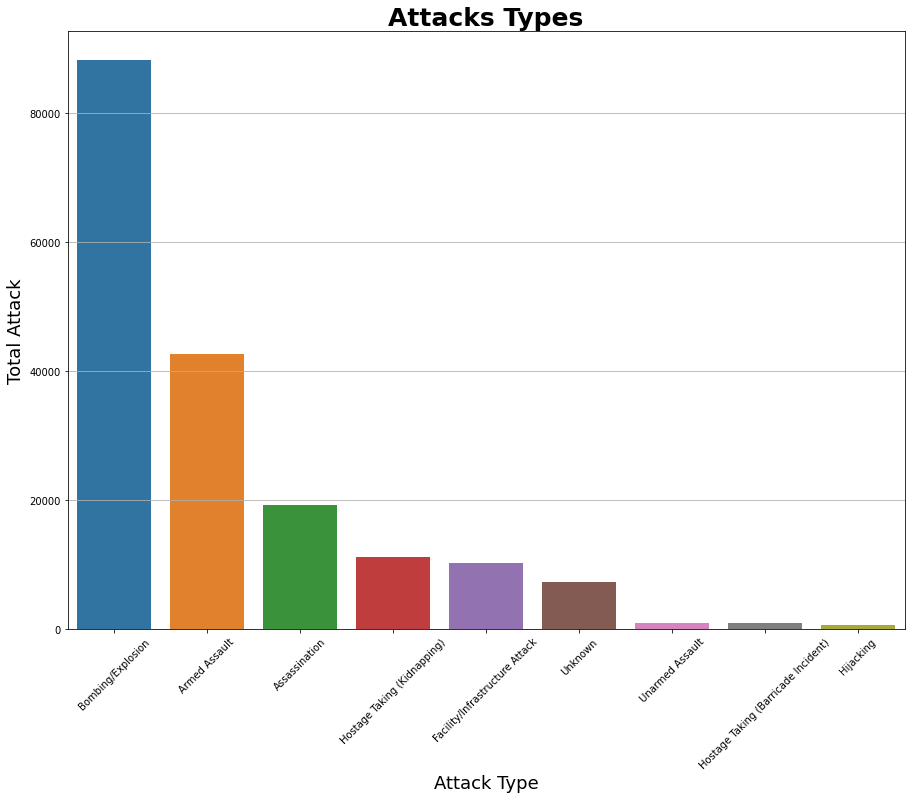

In [50]:
#Analysing the Type of attack from the sum of overall attacks

plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["attacktype1_txt"].value_counts()[:20].index, y=df["attacktype1_txt"].value_counts()[:20].values)
plt.ylabel("Total Attack", fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Attack Type", fontsize=18)
plt.grid(axis='y')
plt.title("Attacks Types", size=25, fontweight="bold")
plt.show()

<b>Analysing the Number of attacks by Specific Groups</b>

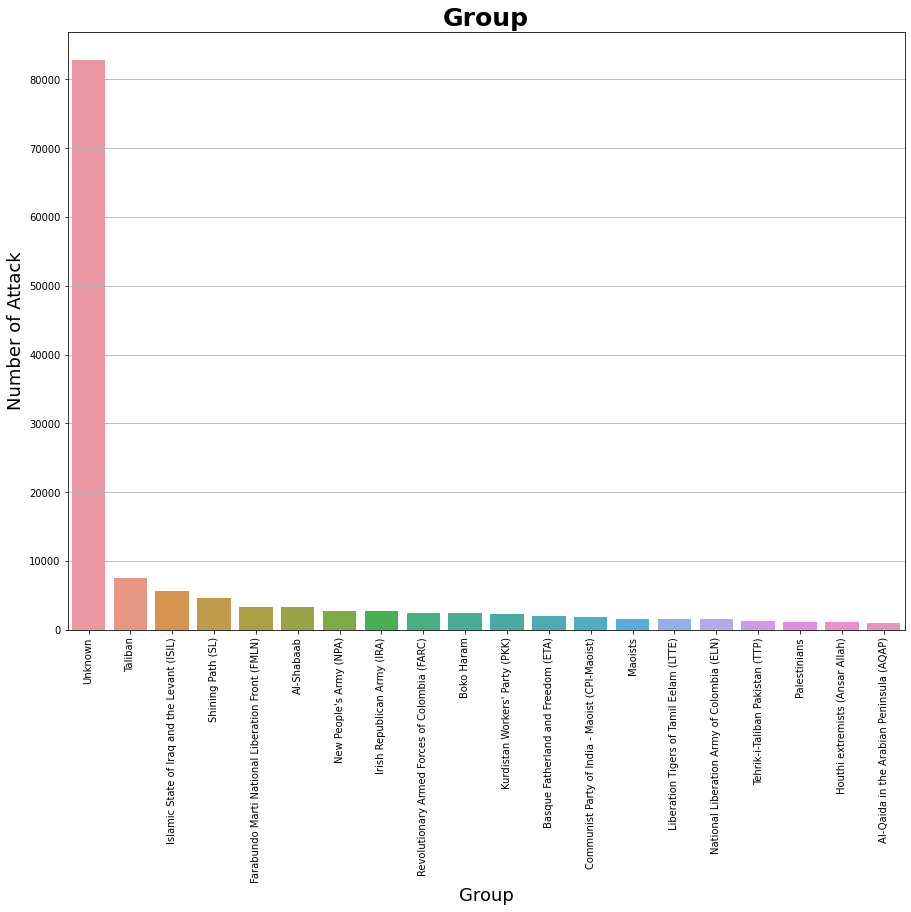

In [62]:
#Analysing the Number of attacks by Specific Groups

plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["gname"].value_counts()[:20].index, y=df["gname"].value_counts()[:20].values)
plt.ylabel("Number of Attack", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Group", fontsize=18)
plt.grid(axis='y')
plt.title("Group", size=25, fontweight="bold")
plt.show()


<h2>Conclusion:</h2>
--------------------------------------------------------------------------------------------------------------------------------------

<ol>
<li><b>Iraq</b> is ranked first on Global Terrorism activity followed by <b>Pakistan, Afganistan, India etc...</b></li>

<li><b>Middle East & North Africa</b> is the region with most attacks.</li>

<li>Most targeted areas are private citizens and infrastructure, military, police etc...</li>

<li>Global Terror attacks rose sharply since <b>2012</b></li>

<li>Year with most terrorist attacks: <b>2014</b></li>

<li>Most attack types: <b>Bombing/Explosion</b></li>

<li><b>Taliban</b> is the known group with most attacks.</ol></li>


<b>------------------------------------------------------------------------------------------Task4 Completed------------------------------------------------------------------------------------------------</b>